# How is employee happiness related to their risk of leaving?

In [53]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import os
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

%matplotlib inline
plt.style.use('ggplot')

## Introduction

**Business Context.** Companies generally like to retain their employees, since hiring and training new employees is costly and risky. The rate at which employees are quitting is called the turnover rate, and the high cost of employee turnover has been pointed out extensively in management literature. A high turnover rate not only increases human resource costs, which can reach up to 150% of the annual salary per replaced employee, but it also has social costs, since it is correlated with lower wages, lower productivity per employee, and not surprisingly, a less loyal workforce. For instance, in 2006, turnover at Walmart’s Sam’s Club was 44\% with an average hourly pay of \\$10.11, while at Costco it was a much lower 17\% with a higher \\$17.00 hourly wage [2]. In addition, a more recent study correlated companies with low turnover with a series of socially positive characteristics dubbed "high-involvement work practices".

Studying employee happiness at workplaces is an important area of investigation in the modern economic market. This enables company managers get a sense of which features are related to turnover. You work in your company’s new talent analytics department. Your company has thousands of employees and is interested in reducing the time spent recruiting and hiring new employees to replace the people that quit.

**Business Problem.** Your company has tasked you to answer the following question: **"Does employee happiness predict turnover?"**

**Analytical Context.** In the last cases, you practiced data literacy, information gathering, and information sufficiency. You have also practiced basic exploratory data analysis (EDA). In this case, you will continue to practice applying these tools, but you will also see more advanced EDA. In this case, there are so many variables that it is difficult to meaningfully explore all of them at the same time. As a result, we will focus on exploring small subsets of the variables. The dataset we will be working with is from 34 different Spanish companies that recorded employee data as part of a corporate feedback program.

<img src=files/productivity_attrition.jpg width="600">

## Understanding the data

The employee dataset was collected across 34 different companies from May 10, 2014 to March 8, 2017. The companies belong to one of the following sectors:

1. E-payments
2. IT consulting services
3. Retail
4. Manufacturing
5. Services
6. Tourism
7. Education

About half of the companies are multinational and the other half are Barcelona-based companies. The bulk of the employees used the app in Spain (Barcelona area), and more than 90% are Spanish nationals. The comments are written in various languages: 97% in Spanish, 2% in English, and 1% Catalan. 1.6% of the comment file (measured in bytes) corresponded to emoji symbols. Employee turnover was detected when the employee was removed from the Enterprise Resource Planning (ERP) system which is linked to backend of the app provider.

The data consists of four tables: `votes`, `comments`, `interactions`, and `churn` (employee turnover).  A vote was obtained when an employee opened the app and answered the question:
> How happy are you at work today?

To vote, the employee indicates their feeling by touching one of four icons that appeared on the screen:

* **4: Great**

* **3: Good**

* **2: So-so**

* **1: Pretty Bad**

After the employee indicates their happiness level, a second screen appears where they can input a text explanation 
(usually a complaint, suggestion, or comment); this is the `comments` table. Out of 4,356 employees, 2,638 employees commented at least once. Finally, in a third screen the employee can see their peers’ comments and like or dislike them; this data is stored in the `interactions` table. 3,516 employees liked or disliked at least one of their peers’ comments.

Let's take a look at the raw tables:

In [2]:
# Load in the raw dataframes.
votes_df    = pd.read_csv("files/votes.csv")
comments_df = pd.read_csv("files/comments.csv")
likes_df    = pd.read_csv("files/interactions.csv")
churn_df    = pd.read_csv("files/churn.csv")

In [3]:
votes_df.head(10)

employee              companyAlias                      voteDate  vote
0        31  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     4
1        33  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     4
2        79  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     4
3        94  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     4
4        16  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     2
5        20  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     2
6        22  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     2
7        41  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     2
8        83  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     2
9        12  56aec740f1ef260003e307d6  Mon Feb 01 01:00:00 CET 2016     3

In [4]:
comments_df.head(10)

employee              companyAlias                 commentId  \
0       307  56aec740f1ef260003e307d6  58d018d7e010990004e38070   
1       382  56aec740f1ef260003e307d6  58d0179ae010990004e3806d   
2       172  56aec740f1ef260003e307d6  58cff8cde010990004e37f6a   
3       135  56aec740f1ef260003e307d6  58cfefeee010990004e37f60   
4       225  56aec740f1ef260003e307d6  58cfd9b4e010990004e37f52   
5        18  56aec740f1ef260003e307d6  58cfd7e2e010990004e37f4f   
6       175  56aec740f1ef260003e307d6  58cfbdb53047cd000460dbcd   
7       491  56aec740f1ef260003e307d6  58cfbc333047cd000460dbcc   
8       158  56aec740f1ef260003e307d6  58cfb1ee3047cd000460dbb9   
9       124  56aec740f1ef260003e307d6  58cfa0af3047cd000460dba7   

                                                 txt  likes  dislikes  \
0  **********************************************...    4.0       0.0   
1                      *****************************    1.0       2.0   
2                        ***************************    3.0       0.0   
3                        ***************************    1.0       1.0   
4                  *********************************    3.0       2.0   
5  **********************************************...    1.0       0.0   
6  **********************************************...   13.0       1.0   
7  **********************************************...    4.0       0.0   
8  **********************************************...    5.0       0.0   
9                              *********************    2.0       0.0   

                    commentDate  
0  Mon Mar 20 19:00:17 CET 2017  
1  Mon Mar 20 18:55:16 CET 2017  
2  Mon Mar 20 16:44:02 CET 2017  
3  Mon Mar 20 16:06:08 CET 2017  
4  Mon Mar 20 14:30:50 CET 2017  
5  Mon Mar 20 14:23:02 CET 2017  
6  Mon Mar 20 12:28:45 CET 2017  
7  Mon Mar 20 12:23:54 CET 2017  
8  Mon Mar 20 11:39:14 CET 2017  
9  Mon Mar 20 10:27:51 CET 2017

In [5]:
likes_df.head(10)

employee              companyAlias  liked disliked  \
0       307  56aec740f1ef260003e307d6   True    False   
1        36  56aec740f1ef260003e307d6   True    False   
2       276  56aec740f1ef260003e307d6   True    False   
3        24  56aec740f1ef260003e307d6   True    False   
4       382  56aec740f1ef260003e307d6   True    False   
5        24  56aec740f1ef260003e307d6  False     True   
6       217  56aec740f1ef260003e307d6  False     True   
7       164  56aec740f1ef260003e307d6   True    False   
8        34  56aec740f1ef260003e307d6   True    False   
9       152  56aec740f1ef260003e307d6   True    False   

                  commentId  
0  58d018d7e010990004e38070  
1  58d018d7e010990004e38070  
2  58d018d7e010990004e38070  
3  58d018d7e010990004e38070  
4  58d0179ae010990004e3806d  
5  58d0179ae010990004e3806d  
6  58d0179ae010990004e3806d  
7  58cff8cde010990004e37f6a  
8  58cff8cde010990004e37f6a  
9  58cff8cde010990004e37f6a

In [6]:
churn_df.head(10)

employee              companyAlias  numVotes         lastParticipationDate  \
0       512  56aec740f1ef260003e307d6         4  Thu Feb 23 12:48:04 CET 2017   
1        -2  56aec740f1ef260003e307d6         0  Wed Jan 18 14:00:55 CET 2017   
2         2  56aec740f1ef260003e307d6        72  Fri Mar 17 01:00:00 CET 2017   
3       487  56aec740f1ef260003e307d6        14  Sat Nov 19 15:02:14 CET 2016   
4         3  56aec740f1ef260003e307d6        22  Thu Feb 16 01:00:00 CET 2017   
5        -4  56aec740f1ef260003e307d6         0  Mon Nov 07 17:41:56 CET 2016   
6         4  56aec740f1ef260003e307d6       195  Mon Mar 20 01:00:00 CET 2017   
7       516  56aec740f1ef260003e307d6        29  Mon Mar 20 12:28:45 CET 2017   
8       475  56aec740f1ef260003e307d6        15  Sun Nov 06 19:38:30 CET 2016   
9         5  56aec740f1ef260003e307d6        42  Tue Mar 14 01:00:00 CET 2017   

   stillExists  
0         True  
1        False  
2         True  
3        False  
4         True  
5        False  
6         True  
7         True  
8        False  
9         True

### Exercise 1:

1. What variables can you use as a measure of employee happiness? What variables can you use as a measure of employee retention?
2. What other factors can contribute to employee retention that are not related to happiness? Are these factors included in any of the datasets above? Which ones are, and which ones are missing?

### <span style="color:red"> **Answer**

1. <span style="color:red">To measure employee happiness we can use the kind of comments that each employee had that maybe can be judged by likes or dislikes if we don't have the raw text.
    To measure employee retention we can use also the kind of comments, and can search for the relationsheep between likes, comments, the likes and votes of their participation.
    

2. <span style="color:red">Their personal conditions (like if have family in charge), their salaries, asking for company information, that shows their membership for the company
    
   
   


## Exploring employee happiness votes (40 minutes)

We will begin by exploring the first dataset, containing data about employees' votes using the app. We will get a rough sense of the size of the data available to us and employee engagement on the app, which is the measurement tool that was used to the collect the data we are analyzing.

### Data Cleaning (`votes_df`)
While other cases will focus on teaching you proper data cleaning, here the code is provided for you. Feel free to try and understand what the code does and why this cleaning is necessary. Oftentimes we remove erroneous, superfluous, or cumbersome data.

In [7]:
# Remove companies that have low engagement numbers and no comments.
votes_df = votes_df[(votes_df['companyAlias'] != "5474b9cde4b0bf7614b2c66f") &
                    (votes_df['companyAlias'] != "58bf03e5cff4fa0004dd44ef") &
                    (votes_df['companyAlias'] != "573a0671b5ec330003add34a")]

In [8]:
# Replace companyAlias column with shorter labels for readability.
labels = ["A","B","C","D","E","F","G","H","I","J","K","L",
          "M","N","O","P","Q","R","S","T","V","W","X","Y",
          "Z","AA","AB","AC","AD","AE","AF","AG","AH","AI","AJ"]
unique_company_alias = votes_df['companyAlias'].unique()
mapAlias2Labels = dict(zip(unique_company_alias, labels))
votes_df['companyAlias'] = votes_df['companyAlias'].replace(mapAlias2Labels)

In [9]:
# Clean dates from timezone.
votes_df['voteDate'] = votes_df['voteDate'].map(lambda date: str(date).strip()
                        .replace('CEST', '')
                        .replace('CET', ''))

# Parse date string to date time with format: Mon Dec 25 19:23:59 2019.
votes_df['voteDate'] = pd.to_datetime(votes_df['voteDate'], format="%a %b %d %H:%M:%S %Y")

### Exercise 2:

#### 2.1

How generalizable would any analysis on this dataset be? What other features of the companies would be important to gather to make our analysis more generalizable?


#### 2.2

What issues could there be with the integrity of the data itself?


### <span style="color:blue"> **Answer**

1. <span style="color:red"> We should have the size company, as categorical groups, number of employees, the company sector would be a nice factor to determine if any sector is better than another.
    
2. <span style="color:blue">  There are some issues that could arise:
    
    > null values on the data.
    
    >the source of the data can be segregated
    
    >the employees who fill the data could be forced to comment
    
    
    

### Exercise 3:

#### 3.1

For now, we'll keep the points in Exercise 2 in mind, and proceed ahead. To make our analysis easier, create a new attribute `UID` that is a unique value for each data value by combining `employee` and `companyAlias`.

**Answer:**

In [10]:
# Type code here
votes_df['UID'] = votes_df.employee.astype('str')+"-" + votes_df.companyAlias
votes_df['UID']

0           31-A
1           33-A
2           79-A
3           94-A
4           16-A
           ...  
221219    760-AI
221220    788-AI
221221    798-AI
221222    803-AI
221223    810-AI
Name: UID, Length: 221163, dtype: object

#### 3.2

Since we have identified voluntary responsiveness as a potential confounding factor in the sampling design, let's look at how many employees per company actually used the app to give a response. Using your newly created `uid`, draw a barplot showing the number of employees who voted on happiness at least once for each company alias.

**Answer:**

In [11]:
votesUnCOA =[x.split('-')[1] for x in votes_df.UID.unique()]

In [12]:
dict_votes = {}
for company in votes_df.companyAlias.unique():
    dict_votes[company] = votesUnCOA.count(company)


In [13]:
votes_df_company = pd.DataFrame.from_dict(dict_votes, orient='index').reset_index()
votes_df_company.columns = ['companyAlias','Count']


In [14]:
votes_df_company.head()

companyAlias  Count
0            A    350
1            B     19
2            C    220
3            D    135
4            E    163

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

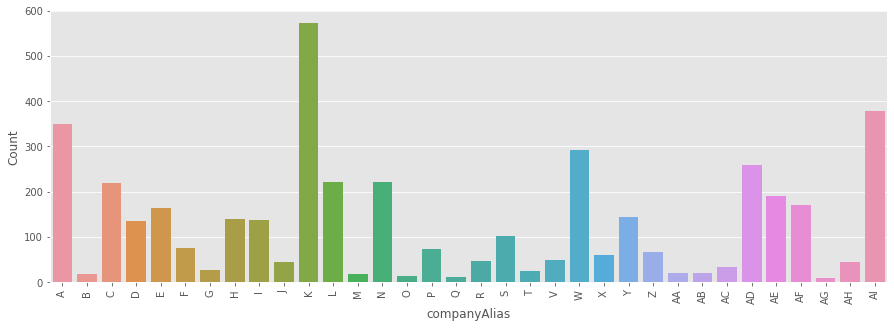

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'companyAlias',y='Count',data=votes_df_company)
plt.xticks(rotation=90)

## Exploring employee feedback comments

Let's now explore the feedback comments.

### Data Cleaning (`comments_df`)

Run the lines below to clean the `comments_df` table.

In [16]:
# Rename columns to something shorter and lowercase.
col_rename_map = {
    'commentDate': 'date',
    'dislikes': 'nolike',
    'likes': 'like',
    'commentId': 'commentid',
    'companyAlias': 'coa',
    'employee': 'id'
}

comments_df.rename(columns=col_rename_map, inplace = True)

In [17]:
# We remove the companies that have low numbers and no comments.
comments_df = comments_df[(comments_df['coa'] != "5474b9cde4b0bf7614b2c66f") &
                          (comments_df['coa'] != "58bf03e5cff4fa0004dd44ef")
                         ]

In [18]:
# Clean dates from timezone.
comments_df['date'] = comments_df['date'].map(lambda date: str(date).strip()
                        .replace('CEST', '')
                        .replace('CET', ''))

# Parse date string to date time with format: Mon Dec 25 19:23:59 2019.
comments_df['date'] = pd.to_datetime(comments_df['date'], format="%a %b %d %H:%M:%S %Y")

In [19]:
# Replace companyAlias column with shorter labels.
unique_company_alias = comments_df['coa'].unique()
mapAlias2Labels = dict(zip(unique_company_alias, labels))
comments_df['coa'] = comments_df['coa'].replace(mapAlias2Labels)

In [20]:
# Make a unique ID for every entry by concatenating employee ID and company alias.
comments_df['uid'] = (comments_df[['id', 'coa']]
                   .apply(lambda x: '{}{}'.format(x[0], x[1]).replace('\n', ''), axis=1))

### Exercise 4:

Notice that something challenging about the `comments_df` table is that the `text` column, containing the text of the employee comments themselves, have been de-identified. This means a comment like `I hate my company` is reduced to `*****************`: one `*` for every character in the comment. While this reduces the amount of information on employee comments substantially, is there anything we can still gain from analyzing this data?


<span style="color:red"> **Answer**
    
<span style="color:red"> We can Determine a pattern that cross their vote (if good, or bad) and their comments, that maybe have a particular correlation.

### Exercise 5:

Let's go through and create features related to our thoughts above.

#### 5.1

Count how many likes there are for each company alias.

**Answer:**

In [21]:
# Type code here
likesByArea = comments_df.groupby('coa')['like'].count().reset_index(name='Count').sort_values('Count').reset_index(drop=True)

In [22]:
likesByArea.head()

coa  Count
0   Q     14
1  AB     16
2  AG     24
3   O     42
4  AC     68

#### 5.2
Add a column `lcomment` that counts the length of the comment in `txt`.

**Answer:**

In [23]:
comments_df

id coa                 commentid  \
0      307   A  58d018d7e010990004e38070   
1      382   A  58d0179ae010990004e3806d   
2      172   A  58cff8cde010990004e37f6a   
3      135   A  58cfefeee010990004e37f60   
4      225   A  58cfd9b4e010990004e37f52   
...    ...  ..                       ...   
82751  118  AI  58ae85a69fd38f00045eeee4   
82752  -10  AI  58ae7fa19fd38f00045eeee2   
82753   -8  AI  58adbfcbb8242400048bf8c1   
82754   64  AI  58adba78b8242400048bf8b5   
82755  361  AI  58adb214b8242400048bf8a6   

                                                     txt  like  nolike  \
0      **********************************************...   4.0     0.0   
1                          *****************************   1.0     2.0   
2                            ***************************   3.0     0.0   
3                            ***************************   1.0     1.0   
4                      *********************************   3.0     2.0   
...                                                  ...   ...     ...   
82751  **********************************************...   1.0     0.0   
82752                                  *****************   2.0     0.0   
82753                             **********************   5.0     0.0   
82754                 **********************************   3.0     0.0   
82755                                                NaN   NaN     NaN   

                     date    uid  
0     2017-03-20 19:00:17   307A  
1     2017-03-20 18:55:16   382A  
2     2017-03-20 16:44:02   172A  
3     2017-03-20 16:06:08   135A  
4     2017-03-20 14:30:50   225A  
...                   ...    ...  
82751 2017-02-23 07:44:48  118AI  
82752 2017-02-23 07:22:12  -10AI  
82753 2017-02-22 17:43:39   -8AI  
82754 2017-02-22 17:20:07   64AI  
82755                 NaT  361AI  

[82668 rows x 8 columns]

In [24]:
# Type code here
comments_df['lcomment'] = comments_df['txt'].apply(lambda x: len(str(x)))

In [25]:
comments_df[['txt','lcomment']].head()

txt  lcomment
0  **********************************************...        62
1                      *****************************        29
2                        ***************************        27
3                        ***************************        27
4                  *********************************        33

#### 5.3

Determine the average comment length per company. Call this feature `n_comments`. Plot the distribution of `n_comments` across the companies.

**Answer:**

In [26]:
# Type code here
dfCom = comments_df.groupby('coa')['lcomment'].mean()

In [27]:
dfCom.head()

coa
A     81.559554
AA    28.100000
AB    13.750000
AC    14.294118
AD    68.388817
Name: lcomment, dtype: float64

In [28]:
# Type code here
comments_df.n_comments = 0

for coa in dfCom.index:
    comments_df.loc[comments_df.coa==coa ,'n_comments'] = dfCom[coa]

In [29]:
comments_df.head()

id coa                 commentid  \
0  307   A  58d018d7e010990004e38070   
1  382   A  58d0179ae010990004e3806d   
2  172   A  58cff8cde010990004e37f6a   
3  135   A  58cfefeee010990004e37f60   
4  225   A  58cfd9b4e010990004e37f52   

                                                 txt  like  nolike  \
0  **********************************************...   4.0     0.0   
1                      *****************************   1.0     2.0   
2                        ***************************   3.0     0.0   
3                        ***************************   1.0     1.0   
4                  *********************************   3.0     2.0   

                 date   uid  lcomment  n_comments  
0 2017-03-20 19:00:17  307A        62   81.559554  
1 2017-03-20 18:55:16  382A        29   81.559554  
2 2017-03-20 16:44:02  172A        27   81.559554  
3 2017-03-20 16:06:08  135A        27   81.559554  
4 2017-03-20 14:30:50  225A        33   81.559554

## Exploring employee interactions and likes

We will now explore the third dataset, containing data about employees' interactions (by liking each other's comments) using the app.

### Data Cleaning (`likes_df`)

In [30]:
# Remove the company with alias 58a728a (useless data).
likes_df = likes_df[likes_df['companyAlias'] != '58a728a']

In [31]:
# Replace companyAlias column with shorter labels.
unique_company_alias = likes_df['companyAlias'].unique()
mapAlias2Labels = dict(zip(unique_company_alias, labels))
likes_df['companyAlias'] = likes_df['companyAlias'].replace(mapAlias2Labels)

In [32]:
# Make a unique ID for every entry by concatenating employee ID and company alias.
likes_df['uid'] = (likes_df[['employee', 'companyAlias']]
                   .apply(lambda x: '{}{}'.format(x[0], x[1]).replace('\n', ''), axis=1))

In [33]:
# Check that the dataframe now looks the way you expect.
likes_df.head(10)

employee companyAlias  liked disliked                 commentId   uid
0       307            A   True    False  58d018d7e010990004e38070  307A
1        36            A   True    False  58d018d7e010990004e38070   36A
2       276            A   True    False  58d018d7e010990004e38070  276A
3        24            A   True    False  58d018d7e010990004e38070   24A
4       382            A   True    False  58d0179ae010990004e3806d  382A
5        24            A  False     True  58d0179ae010990004e3806d   24A
6       217            A  False     True  58d0179ae010990004e3806d  217A
7       164            A   True    False  58cff8cde010990004e37f6a  164A
8        34            A   True    False  58cff8cde010990004e37f6a   34A
9       152            A   True    False  58cff8cde010990004e37f6a  152A

Consider the following summary statistics on the variables in `likes_df` and then answer the question below.

In [34]:
likes_df.describe(include='all')

employee companyAlias   liked disliked                 commentId  \
count   336959.000000       336959  336959   336959                    336959   
unique            NaN           34       2        2                     37520   
top               NaN            K    True    False  58be80b80d9dcc0004d853ac   
freq              NaN        73691  284398   284398                        86   
mean       162.880098          NaN     NaN      NaN                       NaN   
std        182.069568          NaN     NaN      NaN                       NaN   
min       -218.000000          NaN     NaN      NaN                       NaN   
25%         38.000000          NaN     NaN      NaN                       NaN   
50%        122.000000          NaN     NaN      NaN                       NaN   
75%        212.000000          NaN     NaN      NaN                       NaN   
max        999.000000          NaN     NaN      NaN                       NaN   

           uid  
count   336959  
unique    3516  
top       101K  
freq      3774  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

### Exercise 6:

#### 6.1

Determine the average `liked` across the entire dataset.

**Answer:**

In [55]:
# Type code here
print("The average liked is: {0:.2f}".format(likes_df['liked'].mean() ))

The average liked is: 0.84


#### 6.2

How useful is the above metric? Why or why not? If not, please indicate what alternative metric(s) you would look at and create a plot for it if helpful.  In this exercise, we will determine the mean of `liked` by company and plot the resulting distribution.


In [36]:
# Type code here
df_like_coa = likes_df.groupby('companyAlias')[['liked']].sum()

In [37]:
df_like_coa.head()

liked
companyAlias       
A             33547
AA               68
AB                2
AC                6
AD             3191

In [38]:
df_like_coa_mean = df_like_coa/likes_df['liked'].sum()

In [39]:
df_like_coa_mean.head()

liked
companyAlias          
A             0.117958
AA            0.000239
AB            0.000007
AC            0.000021
AD            0.011220

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

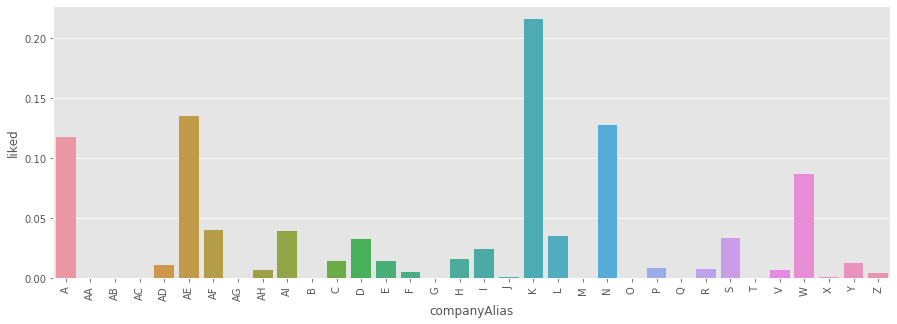

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_like_coa_mean.index,y='liked',data=df_like_coa_mean)
plt.xticks(rotation=90)


## Exploring the relationship between happiness features and turnover

### Data Cleaning (`churn_df`)

In [41]:
# Remove the companies with useless data.
churn_df = churn_df[churn_df['companyAlias'] != '573a0671b5ec330003add34a']
churn_df = churn_df[churn_df['companyAlias'] != '58a728a0e75bda00042a3468']
churn_df = churn_df[churn_df['companyAlias'] != '573a0671b5ec330003add34a']

In [42]:
# Replace companyAlias column with shorter labels.
unique_company_alias = churn_df['companyAlias'].unique()
mapAlias2Labels = dict(zip(unique_company_alias, labels))
churn_df['companyAlias'] = churn_df['companyAlias'].replace(mapAlias2Labels)

In [43]:
# Make a unique ID for every entry by concatenating employee ID and company alias.
churn_df['uid'] = (churn_df[['employee', 'companyAlias']]
                   .apply(lambda x: '{}{}'.format(x[0], x[1]).replace('\n', ''), axis=1))

In [44]:
# Check that the dataframe now looks the way you expect.
churn_df.head(10)

employee companyAlias  numVotes         lastParticipationDate  stillExists  \
0       512            A         4  Thu Feb 23 12:48:04 CET 2017         True   
1        -2            A         0  Wed Jan 18 14:00:55 CET 2017        False   
2         2            A        72  Fri Mar 17 01:00:00 CET 2017         True   
3       487            A        14  Sat Nov 19 15:02:14 CET 2016        False   
4         3            A        22  Thu Feb 16 01:00:00 CET 2017         True   
5        -4            A         0  Mon Nov 07 17:41:56 CET 2016        False   
6         4            A       195  Mon Mar 20 01:00:00 CET 2017         True   
7       516            A        29  Mon Mar 20 12:28:45 CET 2017         True   
8       475            A        15  Sun Nov 06 19:38:30 CET 2016        False   
9         5            A        42  Tue Mar 14 01:00:00 CET 2017         True   

    uid  
0  512A  
1   -2A  
2    2A  
3  487A  
4    3A  
5   -4A  
6    4A  
7  516A  
8  475A  
9    5A

### Exercise 7:

In this exercise, we will put several things together to answer the original question: *Is employee happiness associated with retention?*

#### 7.1

Find and plot mean retention by company.

**Answer:**

In [59]:
# Type code here
churn_dfRet = churn_df[['companyAlias','stillExists']].groupby('companyAlias').mean()
churn_dfRet.sort_values('stillExists').head()

stillExists
companyAlias             
C                0.151786
K                0.376426
B                0.636364
J                0.725490
I                0.771242

#### 7.2

Plot the distribution of the number of unique employees contributing at least one vote for each company. (Hint: you will want to use the `votes_df` table.)

**Answer:**

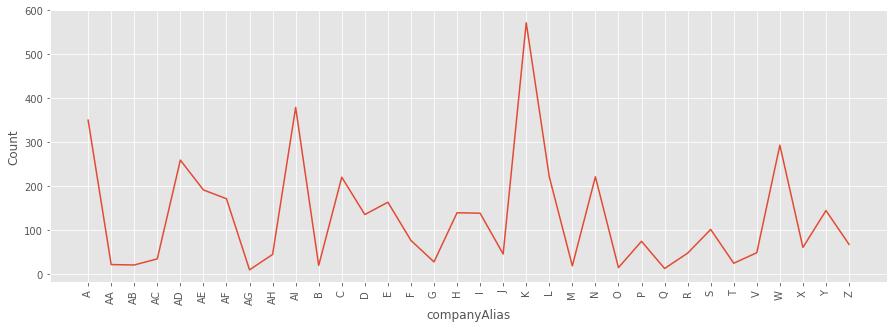

In [77]:
# Type code here
f, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
ax = sns.lineplot(x = 'companyAlias',y='Count',data=votes_df_company)


#### 7.3

Plot the distribution of the number of unique employees contributing at least one vote for each company.

**Answer:**

In [48]:
# Type code here

#### 7.4

Plot the distribution of the average value of each vote per employee for each company.

**Answer:**

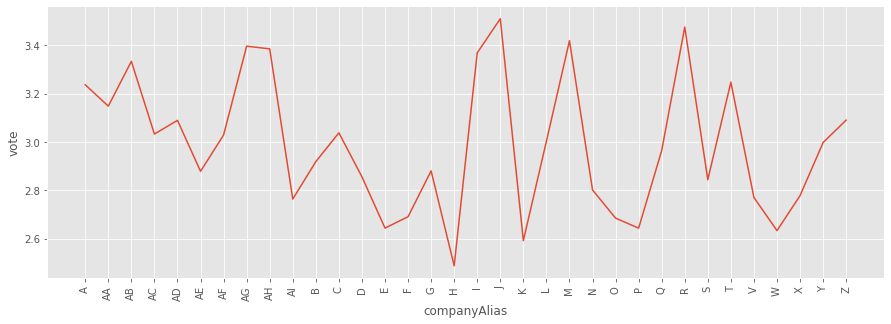

In [80]:
# Type code here
votesmean = votes_df[['companyAlias','vote']].groupby('companyAlias',as_index=False).mean()
f, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
ax = sns.lineplot(x = 'companyAlias',y='vote',data=votesmean)

#### 7.5

Now, put everything above together and determine how the mean vote per employee relates to the number of votes for each company.

**Answer:**

In [97]:
# Type code here
voteCount = pd.merge(votes_df_company,votesmean,how='inner',on = 'companyAlias')

In [98]:
voteCount.set_index('companyAlias',inplace=True)

In [99]:
voteCount.head()

Count      vote
companyAlias                 
A               350  3.236470
B                19  2.918552
C               220  3.037703
D               135  2.855814
E               163  2.643531

In [100]:
for col in voteCount.columns:
    voteCount[col] = (voteCount[col] - voteCount[col].mean() )/ np.std(voteCount[col])

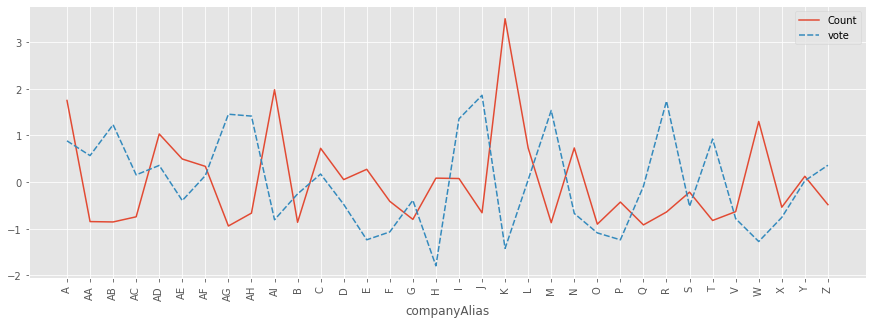

In [101]:
# Type code here
f, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation=90)
ax = sns.lineplot(data=voteCount)

Note that the graph above suggests that there is a negative relationship between participation and happiness. To be specific, it means that the employees that participate the most in this feedback app tend to have the lowest average votes. This suggests that participation on the app might be indicative of unhappier employees.

#### 7.6

Put everthing together to answer the question in the totle of the case:

**Answer:**

In [52]:
# Type code here

**Insert your findings here**